In [ ]:
# import libraries
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Quantify the proportion of cell types in a tissue or region of interest
def quantify_cell_type_proportions(adata, cell_type_column="cell_type", roi_column="tissue_region", regions_of_interest=None):
    """
    Quantify the proportion of cell types in a tissue or region of interest.

    Parameters:
    adata (AnnData): Single cell gene expression data.
    cell_type_column (str): Column name for annotated cell types in adata.obs.
    roi_column (str): Column name for the region of interest in adata.obs.
    regions_of_interest (list): List of regions to analyze. If None, analyzes all regions.

    Returns:
    pd.DataFrame: DataFrame with cell type proportions for each region.
    """
    if regions_of_interest is None:
        regions_of_interest = adata.obs[roi_column].unique()

    # Store the proportion of each cell type in each region of interest
    proportions = []

    for region in regions_of_interest:
        # Get cells in the region of interest
        region_cells = adata[adata.obs[roi_column] == region]

        # Get the counts of each cell type in this region
        cell_type_counts = region_cells.obs[cell_type_column].value_counts()

        # Calculate the proportion of each cell type in this region
        total_cells_in_region = region_cells.shape[0]
        cell_type_proportions = cell_type_counts / total_cells_in_region

        # Store the results
        for cell_type, proportion in cell_type_proportions.items():
            proportions.append([region, cell_type, proportion])

    # Create a DataFrame to store proportions
    proportions_df = pd.DataFrame(proportions, columns=[roi_column, cell_type_column, "Proportion"])

    return proportions_df


In [ ]:
# Visualize the proportion of cell types in regions of interest
def visualize_cell_type_proportions(proportions_df):
    """
    Visualize the proportions of cell types across different regions of interest using a bar plot.

    Parameters:
    proportions_df (pd.DataFrame): DataFrame with cell type proportions for each region.
    """
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Proportion", y="cell_type", hue="tissue_region", data=proportions_df, palette="viridis")
    plt.title("Proportion of Cell Types in Regions of Interest")
    plt.xlabel("Proportion of Cells")
    plt.ylabel("Cell Type")
    plt.legend(title="Region of Interest")
    plt.tight_layout()
    plt.show()


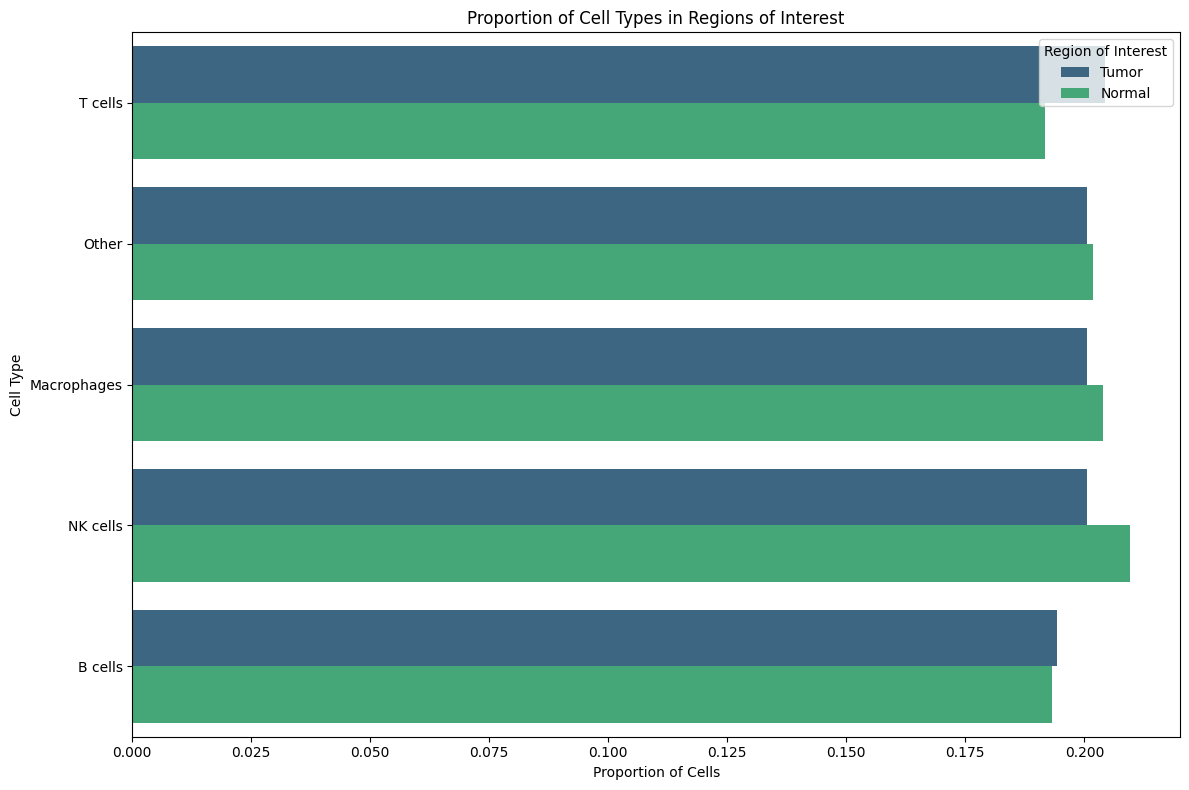

In [ ]:
# Example: Quantify cell types in Tumor and Normal regions
if __name__ == "__main__":
    # Load example single-cell data (AnnData format)
    adata = sc.datasets.pbmc3k()  # Example dataset
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

# Add a 'tissue_region' column with random assignments
regions = ['Tumor', 'Normal']
adata.obs['tissue_region'] = np.random.choice(regions, size=adata.n_obs, replace=True)

# Add a 'cell_type' column with random assignments
cell_types = ['T cells', 'B cells', 'Macrophages', 'NK cells', 'Other']
adata.obs['cell_type'] = np.random.choice(cell_types, size=adata.n_obs, replace=True)

proportions_df = quantify_cell_type_proportions(
    adata,
    cell_type_column="cell_type",
    roi_column="tissue_region",
    regions_of_interest=["Tumor", "Normal"]
)

# Visualize the proportions
visualize_cell_type_proportions(proportions_df)